<center><h1> TD N°1 : SVM avec sklearn </h1></center>
    
    
Pour installer un package vous pouvez utiliser la commande suivante :
    
```
!pip install <nom_module>
```

## Import package

In [7]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn import datasets

#sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

#Classifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC 
from sklearn.linear_model import SGDClassifier , LogisticRegression

from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
#Regressor
from sklearn.svm import LinearSVR
from sklearn.svm import SVR

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.model_selection import cross_val_score ,learning_curve ,GridSearchCV
from sklearn_evaluation import plot

#Web request
import requests
import io

## Function

**Merci de lire comment s'utilise la fonction avant de l'utiliser !**

In [8]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    
    '''
    
    SEULEMENT pour la fonction SVC de sklearn, pas de LINEARSVC
    
    Function qui permet de recupérer la constante et le coefficient directeur
    d'un svm après entraintement.
    
    Un svm lineaire est de la forme w0*w0+w1*x1 +b =0
    donc 
    >= x1= -w0/w1 *x0 -b/w1
    
    avoir x1 en fonction de x0 permet de tracer la zone de décision du SVM 
    et ainsi avoir une réprésentation graphique
    
    Pour calculer les marges on rajoute +- 1/w[1]
    
    
    '''
    
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

In [9]:
def svm_f_importances(coef_svm , names):
    ''' 
    Cette fonction permet de visualiser l'importance de chaque variable pour le modèle SVM
    Vous devez passer 2 arguments :
    
    - coef_svm : Les coefficients du modèle disponible après votre .fit()
      On le récupère avec la commande suite  svc_fit.coef_[0]
      
    - names : est le nom des features que vous avez utilisées.
      ATTENTION les passer dans le même ordre que pour l'entrainement du modèle
    
    '''
    imp = coef_svm
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

#features_names = ['input1', 'input2']
#svm = svm.SVC(kernel='linear')
#svm.fit(X, Y)
#f_importances(svm.coef_[0], features_names)

## Exercice N°1 : Classification données IRIS avec un SVM


#### Exploration and data analysis (EDA)
1) Importer le dataset Iris

2) Faire des stats descriptives pour mieux comprendre le dataset

3) Recoder les données dans le bon format si nécessaire 

4) Découper le dataset en train et test

#### Modélisation binaire (2 target)

5) Importer les modèles de  **régression logistic , SVC, LinearSVC et SGDClassifier** avec sklearn

6) Choisir maximum 2 colonnes dans votre nouveau data et entrainer un SVM avec le module SVC.<br>
- 6.1) Tracer la frontière de décision de votre modèle avec la fonction fournie. Visualiser le résultat.<br>
- 6.2) Faites varier le critère de régularisation $C$ et regarder son impact sur la frontière de décision. Tester plusieurs valeurs.<br>
- 6.3) Commenter l'effet de C sur votre modèle<br>
- 6.4) Recommencer avec une autre paire de features pour fit votre modèle.<br>


7) Entrainer les 4 modèles sur les données et évaluer la performance des modèles (uniquement avec le dataset train)<br>
   Utiliser les valeurs par défaut des modèles, ne pas tuner.<br>
   Réaliser une cross-validation pour évaluer votre modèle.<br>
   Justifier le type de cross_validation choisie.<br>

8) Imaginons que ce soit le SVM par défaut qui donne le meilleur score, tuner ce modèle pour l'améliorer
- 8.1) Utiliser un grid search pour définir les meilleurs hyperparamètres.<br>
- 8.2) Utiliser une learning curve pour voir comment votre modèle apprend à partir des données.<br>
- 8.3) **Uniquement si vous avez le temps**, examiner l'influence des hyperparamètres sur la qualité de votré modèle avec des          *validation curve*.

9) Entrainer votre modèle sur les meilleurs hyperparamètres. 

10) Réaliser une prédiction avec votre modèle sur le dataset test.<br> 
    Evaluer la performance de votre modèle.<br>
    Regarder les variables qui participent le plus à votre modèle, utiliser la fonction fournie.<br>
    Commenter les résultats


#### Modélisation multiclass

11) A partir du dataset iris avec les 3 espèces, réaliser une classification multiclass.
- 11.1) Tester les différentes méthodes, OVR et OVO  
- 11.2) Existe-il des différences entre les méthodes?

## Partie code, a vous de jouer 🐍

### Exploration and data analysis

#### 1) Importer le dataset Iris depuis sklearn

In [10]:
#1
#Import dataset from sklearn

sk_iris = datasets.load_iris()

#Si besoin
#iris = pd.DataFrame(data= np.c_[sk_iris.data, sk_iris.target], columns=sk_iris['feature_names']+['species'] )

Aperçu des 5 premières lignes du DataFrame :
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Résumé statistique :
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Valeurs 

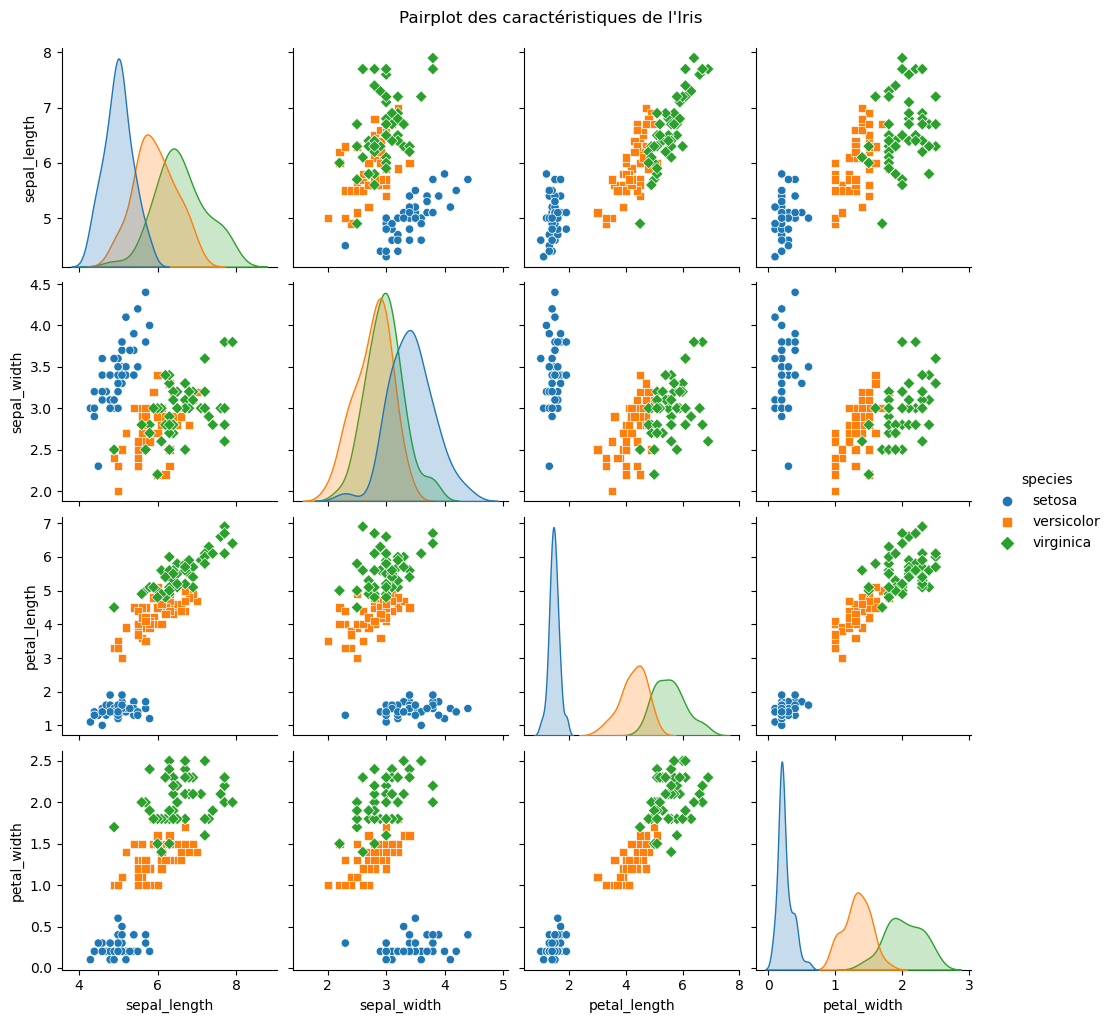

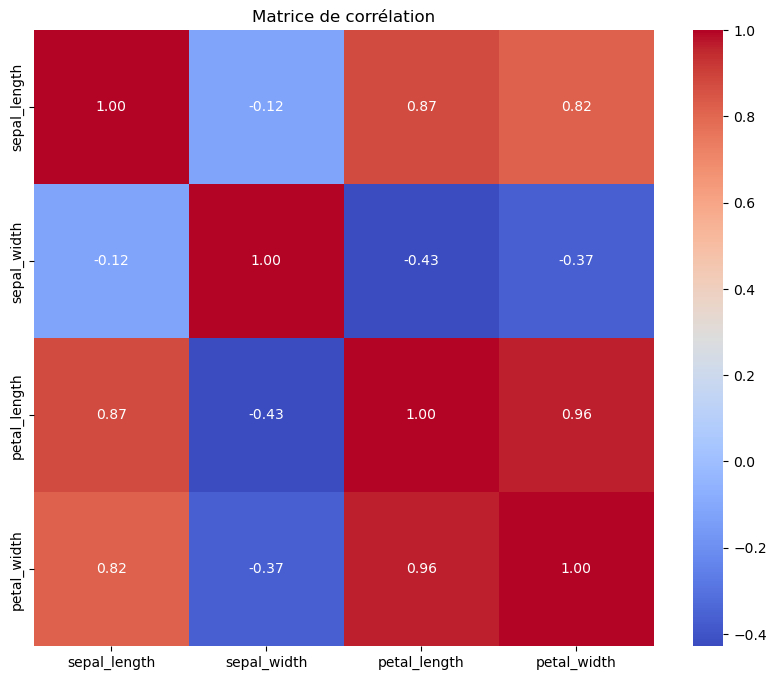

In [11]:
# Importation des bibliothèques nécessaires
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

# 1. Importer le dataset Iris depuis sklearn
sk_iris = datasets.load_iris()

# 2. Convertir les données en DataFrame pandas pour une analyse plus facile
iris = pd.DataFrame(
    data=np.c_[sk_iris.data, sk_iris.target], 
    columns=sk_iris['feature_names'] + ['species']
)

# Renommer les colonnes pour un formatage plus propre
iris.columns = [col.replace(" (cm)", "").replace(" ", "_") for col in iris.columns]

# Convertir la colonne "species" en catégorie avec des noms de classes
iris['species'] = iris['species'].map({i: name for i, name in enumerate(sk_iris.target_names)})

# 3. Aperçu des données
print("Aperçu des 5 premières lignes du DataFrame :")
print(iris.head())

print("\nRésumé statistique :")
print(iris.describe())

# 4. Vérification des données manquantes
print("\nValeurs manquantes :")
print(iris.isnull().sum())

# 5. Visualisation des données
sns.pairplot(iris, hue='species', diag_kind='kde', markers=['o', 's', 'D'])
plt.suptitle("Pairplot des caractéristiques de l'Iris", y=1.02)
plt.show()

# 6. Matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(iris.iloc[:, :-1].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()


#### 2) Statistiques descriptives

In [ ]:
#Tester pygwalker si vous avez le temps

In [12]:
 # Vous pouvez tester Pygwalker ici ?
# Importation des bibliothèques nécessaires
import pandas as pd
from sklearn import datasets
import pygwalker as pyg

# Charger le dataset Iris
sk_iris = datasets.load_iris()
iris = pd.DataFrame(
    data=sk_iris.data,
    columns=sk_iris.feature_names
)
iris['species'] = pd.Categorical.from_codes(sk_iris.target, sk_iris.target_names)

# Lancer Pygwalker pour explorer les données
pyg.walk(iris)


Box(children=(HTML(value='\n<div id="ifr-pyg-00062b5a10501ab1hU7PCoWStgeMD168" style="height: auto">\n    <hea…

#### 3) Recoder variables, si besoin

In [13]:
# Recoder la variable 'species' en entiers
iris['species_numeric'] = iris['species'].cat.codes
print(iris[['species', 'species_numeric']].head())


  species  species_numeric
0  setosa                0
1  setosa                0
2  setosa                0
3  setosa                0
4  setosa                0


In [14]:
print(iris.columns)


Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'species', 'species_numeric'],
      dtype='object')


In [15]:
# Reformater les noms des colonnes pour éviter les erreurs
iris.columns = [col.replace(" (cm)", "").replace(" ", "_") for col in iris.columns]

print(iris.columns)  # Vérification des nouveaux noms


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'species_numeric'],
      dtype='object')


In [16]:
# Créer des catégories pour la longueur du sépale
iris['sepal_length_category'] = pd.cut(
    iris['sepal_length'],  # Nom corrigé
    bins=[4.0, 5.5, 6.5, 8.0],  # Définition des bornes
    labels=["Court", "Moyen", "Long"]
)

print(iris[['sepal_length', 'sepal_length_category']].head())


   sepal_length sepal_length_category
0           5.1                 Court
1           4.9                 Court
2           4.7                 Court
3           4.6                 Court
4           5.0                 Court


In [17]:
# Afficher les catégories créées
print(iris['sepal_length_category'].value_counts())

# Aperçu des données avec les nouvelles colonnes
print(iris.head())


Moyen    61
Court    59
Long     30
Name: sepal_length_category, dtype: int64
   sepal_length  sepal_width  petal_length  petal_width species  \
0           5.1          3.5           1.4          0.2  setosa   
1           4.9          3.0           1.4          0.2  setosa   
2           4.7          3.2           1.3          0.2  setosa   
3           4.6          3.1           1.5          0.2  setosa   
4           5.0          3.6           1.4          0.2  setosa   

   species_numeric sepal_length_category  
0                0                 Court  
1                0                 Court  
2                0                 Court  
3                0                 Court  
4                0                 Court  


In [18]:
# Renommer les colonnes pour les rendre plus compréhensibles
iris.rename(columns={
    "sepal_length": "longueur_sépale",
    "sepal_width": "largeur_sépale",
    "petal_length": "longueur_pétale",
    "petal_width": "largeur_pétale"
}, inplace=True)
print(iris.columns)


Index(['longueur_sépale', 'largeur_sépale', 'longueur_pétale',
       'largeur_pétale', 'species', 'species_numeric',
       'sepal_length_category'],
      dtype='object')


In [19]:
# Recoder les noms des espèces
iris['species_abbr'] = iris['species'].replace({
    "setosa": "Set",
    "versicolor": "Ver",
    "virginica": "Vir"
})
print(iris[['species', 'species_abbr']].head())


  species species_abbr
0  setosa          Set
1  setosa          Set
2  setosa          Set
3  setosa          Set
4  setosa          Set


In [20]:
# Exemple de vérification des catégories
print(iris['sepal_length_category'].value_counts())


Moyen    61
Court    59
Long     30
Name: sepal_length_category, dtype: int64


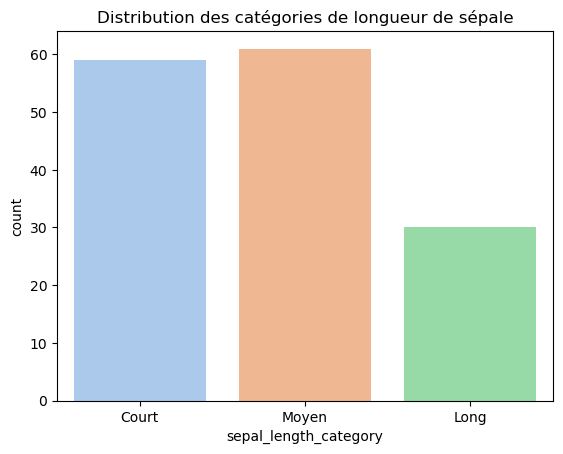

In [21]:
sns.countplot(data=iris, x='sepal_length_category', palette='pastel')
plt.title('Distribution des catégories de longueur de sépale')
plt.show()


In [22]:
iris['taille_totale_sépale'] = iris['longueur_sépale'] + iris['largeur_sépale']
iris['taille_totale_pétale'] = iris['longueur_pétale'] + iris['largeur_pétale']
print(iris[['taille_totale_sépale', 'taille_totale_pétale']].head())


   taille_totale_sépale  taille_totale_pétale
0                   8.6                   1.6
1                   7.9                   1.6
2                   7.9                   1.5
3                   7.7                   1.7
4                   8.6                   1.6


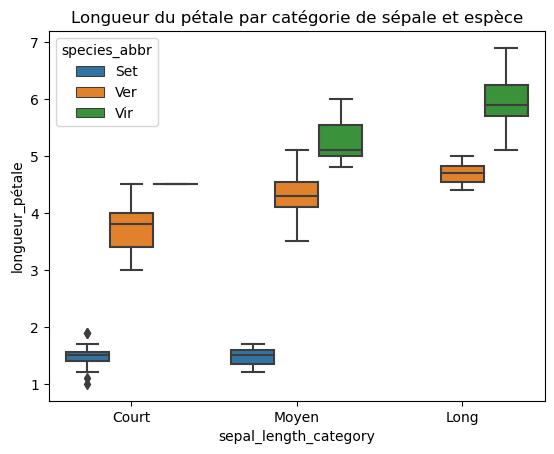

In [23]:
sns.boxplot(data=iris, x='sepal_length_category', y='longueur_pétale', hue='species_abbr')
plt.title('Longueur du pétale par catégorie de sépale et espèce')
plt.show()


In [24]:
iris.to_csv("iris_cleaned.csv", index=False)
print("Le fichier nettoyé a été enregistré sous le nom iris_cleaned.csv.")


Le fichier nettoyé a été enregistré sous le nom iris_cleaned.csv.


### Modélisation binaire

Attention à bien choisir un dataset contenant uniquement **2** espèces pour la modélisation

In [25]:
# Filtrer pour conserver uniquement les espèces 'setosa' et 'versicolor'
iris_binary = iris[iris['species'].isin(['setosa', 'versicolor'])]

# Vérification des données filtrées
print(iris_binary['species'].value_counts())


setosa        50
versicolor    50
virginica      0
Name: species, dtype: int64


#### 4) Découper data set en train et test

In [26]:
# Encoder la variable cible en binaire
iris_binary['target'] = iris_binary['species'].map({'setosa': 0, 'versicolor': 1})

# Vérification
print(iris_binary[['species', 'target']].head())


  species  target
0  setosa     0.0
1  setosa     0.0
2  setosa     0.0
3  setosa     0.0
4  setosa     0.0


C:\Users\lucas\AppData\Local\Temp\ipykernel_7480\4038573869.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_binary['target'] = iris_binary['species'].map({'setosa': 0, 'versicolor': 1})


In [27]:
from sklearn.model_selection import train_test_split

# Séparer les caractéristiques (X) et la cible (y)
X = iris_binary[['longueur_sépale', 'largeur_sépale', 'longueur_pétale', 'largeur_pétale']]
y = iris_binary['target']

# Découper en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Vérification des dimensions des ensembles
print(f"Dimensions de X_train : {X_train.shape}")
print(f"Dimensions de X_test : {X_test.shape}")


Dimensions de X_train : (80, 4)
Dimensions de X_test : (20, 4)


In [28]:
print("Proportions dans y_train :")
print(y_train.value_counts(normalize=True))

print("\nProportions dans y_test :")
print(y_test.value_counts(normalize=True))


Proportions dans y_train :
0.0    0.5
1.0    0.5
Name: target, dtype: float64

Proportions dans y_test :
1.0    0.5
0.0    0.5
Name: target, dtype: float64


In [29]:
# Filtrer pour conserver uniquement les espèces 'setosa' et 'versicolor'
iris_binary = iris[iris['species'].isin(['setosa', 'versicolor'])].copy()  # Copier le DataFrame filtré

# Vérification des données filtrées
print(iris_binary['species'].value_counts())

# Encoder la variable cible en binaire
iris_binary['target'] = iris_binary['species'].map({'setosa': 0, 'versicolor': 1})

# Vérification
print(iris_binary[['species', 'target']].head())

# Séparer les caractéristiques (X) et la cible (y)
X = iris_binary[['longueur_sépale', 'largeur_sépale', 'longueur_pétale', 'largeur_pétale']]
y = iris_binary['target']

# Découper en ensembles d'entraînement et de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Vérification des dimensions des ensembles
print(f"Dimensions de X_train : {X_train.shape}")
print(f"Dimensions de X_test : {X_test.shape}")

# Vérification des proportions des classes
print("Proportions dans y_train :")
print(y_train.value_counts(normalize=True))

print("\nProportions dans y_test :")
print(y_test.value_counts(normalize=True))


setosa        50
versicolor    50
virginica      0
Name: species, dtype: int64
  species  target
0  setosa     0.0
1  setosa     0.0
2  setosa     0.0
3  setosa     0.0
4  setosa     0.0
Dimensions de X_train : (80, 4)
Dimensions de X_test : (20, 4)
Proportions dans y_train :
0.0    0.5
1.0    0.5
Name: target, dtype: float64

Proportions dans y_test :
1.0    0.5
0.0    0.5
Name: target, dtype: float64


#### 5) Importer les modules pour la modélisation

In [1431]:
#... au début du code

In [30]:
# Importation des modèles nécessaires depuis sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier


#### 6) Garder uniquement 2 colonnes du dataset et entrainer un SVM avec module SVC

6.1) Tracer la frontière de décision de votre modèle avec la fonction **plot_svc_decision_boundary**. Visualiser le résultat.<br>
6.2) Faites varier le critère de régularisation $C$ et regarder son impact sur la frontière de décision. Tester plusieurs valeurs.<br>
6.3) Commenter l'effet de $C$ sur votre modèle<br>
6.4) Recommencer avec une autre paire de features pour fit votre modèle.<br>



#### Modélisation binaire avec uniquement 2 features ⚠️

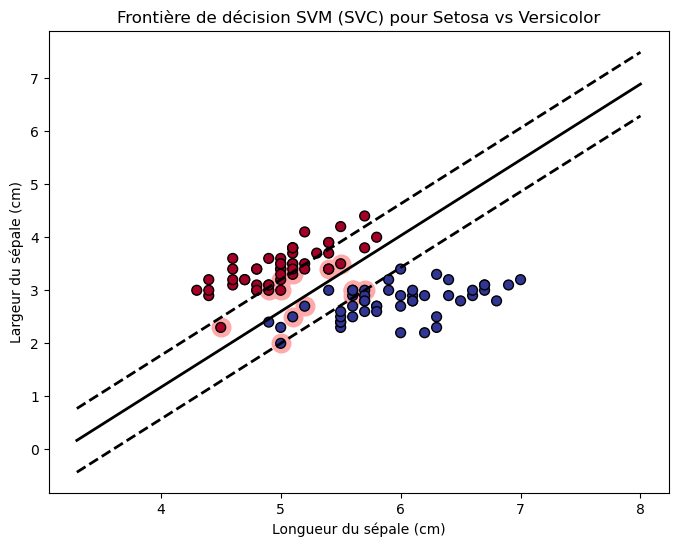

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Garder uniquement deux colonnes (longueur_sépale et largeur_sépale)
iris_binary = iris[iris['species'].isin(['setosa', 'versicolor'])].copy()

# Encoder la variable cible en binaire
iris_binary['target'] = iris_binary['species'].map({'setosa': 0, 'versicolor': 1})

# Sélectionner les caractéristiques
X = iris_binary[['longueur_sépale', 'largeur_sépale']]
y = iris_binary['target']

# Séparer en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Entraîner un SVM avec SVC
svm_clf = SVC(kernel="linear", random_state=42)
svm_clf.fit(X_train, y_train)

# Fonction pour tracer la frontière de décision
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

# Visualiser le résultat avec la fonction plot
plt.figure(figsize=(8, 6))
plot_svc_decision_boundary(svm_clf, X['longueur_sépale'].min() - 1, X['longueur_sépale'].max() + 1)
plt.scatter(X['longueur_sépale'], X['largeur_sépale'], c=y, cmap=plt.cm.RdYlBu, edgecolors='k', s=50)
plt.title('Frontière de décision SVM (SVC) pour Setosa vs Versicolor')
plt.xlabel('Longueur du sépale (cm)')
plt.ylabel('Largeur du sépale (cm)')
plt.show()


In [1432]:
#utilsier plot_svc_decision_boundary()

In [1433]:
#%matplotlib inline
#Utiliser la commande ci-dessus si votre sortie graphique n'affiche rien

### Faire varier le critère de régularisation C

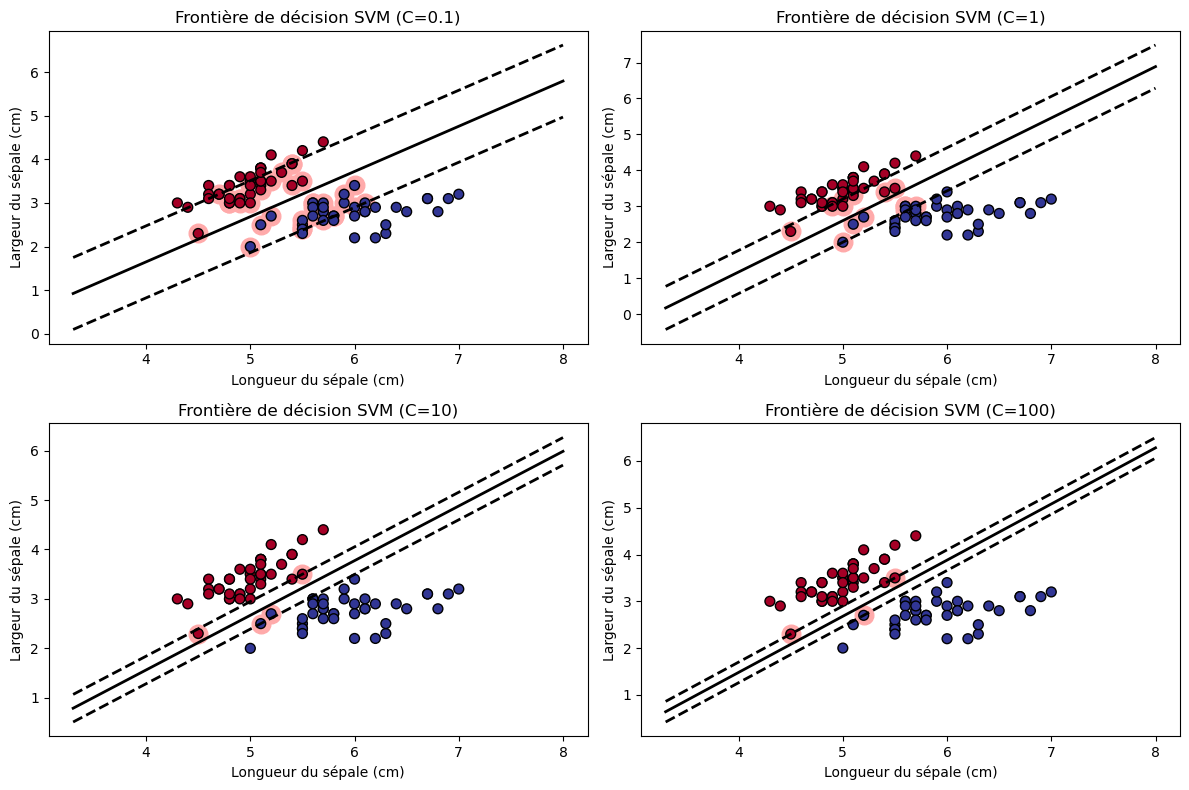

In [32]:
# Fonction pour tester différentes valeurs de C et tracer la frontière de décision
def plot_svm_with_different_C(X, y, C_values):
    plt.figure(figsize=(12, 8))
    
    for i, C in enumerate(C_values, 1):
        # Entraîner un SVM avec SVC pour chaque valeur de C
        svm_clf = SVC(kernel="linear", C=C, random_state=42)
        svm_clf.fit(X, y)
        
        # Tracer la frontière de décision pour chaque modèle
        plt.subplot(2, len(C_values) // 2, i)
        plot_svc_decision_boundary(svm_clf, X['longueur_sépale'].min() - 1, X['longueur_sépale'].max() + 1)
        plt.scatter(X['longueur_sépale'], X['largeur_sépale'], c=y, cmap=plt.cm.RdYlBu, edgecolors='k', s=50)
        plt.title(f'Frontière de décision SVM (C={C})')
        plt.xlabel('Longueur du sépale (cm)')
        plt.ylabel('Largeur du sépale (cm)')
    
    plt.tight_layout()
    plt.show()

# Liste des différentes valeurs de C à tester
C_values = [0.1, 1, 10, 100]

# Tester et afficher les résultats
plot_svm_with_different_C(X_train, y_train, C_values)


##### Commenter l'effet de C

In [ ]:
L'impact du paramètre C dans un modèle SVM est un compromis entre régularisation et précision de la classification. Un petit C favorise une forte régularisation, créant un modèle plus simple, avec une marge plus large, mais susceptible de sous-ajuster les données (sous-apprentissage). À l'inverse, un grand C réduit la régularisation, permettant au modèle de se concentrer sur la minimisation des erreurs, mais il risque de devenir trop complexe et de sur-ajuster les données d'entraînement (sur-apprentissage). Il est donc crucial de tester plusieurs valeurs de C pour trouver celle qui minimise l'erreur sur des données de test tout en maintenant une bonne capacité de généralisation, souvent via la validation croisée.

#### Changer de paire de feature

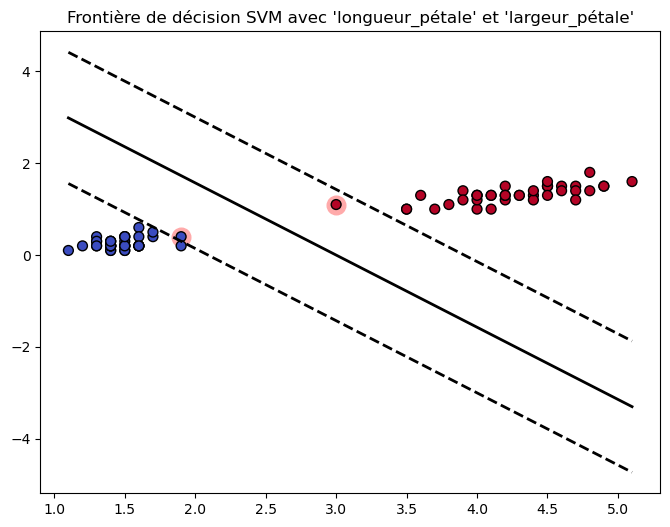

In [33]:
# Choisir une autre paire de caractéristiques
X_new = iris_binary[['longueur_pétale', 'largeur_pétale']]  # Par exemple, 'longueur_pétale' et 'largeur_pétale'
y_new = iris_binary['target']

# Découper en ensembles d'entraînement et de test
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42, stratify=y_new)

# Entraîner un SVM avec la nouvelle paire de caractéristiques
svm_clf_new = SVC(kernel="linear", C=1)
svm_clf_new.fit(X_train_new, y_train_new)

# Tracer la frontière de décision avec la nouvelle paire de caractéristiques
plt.figure(figsize=(8, 6))
plot_svc_decision_boundary(svm_clf_new, X_train_new.iloc[:, 0].min(), X_train_new.iloc[:, 0].max())
plt.scatter(X_train_new.iloc[:, 0], X_train_new.iloc[:, 1], c=y_train_new, cmap='coolwarm', s=50, edgecolors='k')
plt.title("Frontière de décision SVM avec 'longueur_pétale' et 'largeur_pétale'")
plt.show()


#### 7) Entrainer les 4 modèles sur votre dataset d'entrainement

- LogisticRegression
- LinearSVC
- SVC
- SGDClassifier

Conseils :
- Utiliser les valeurs par défaut des modèles, ne pas tuner.<br>
- Réaliser une cross-validation pour évaluer votre modèle.<br>
- Justifier le type de cross_validation choisie.<br>

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

# Initialiser les modèles
models = {
    "Logistic Regression": LogisticRegression(),
    "LinearSVC": LinearSVC(),
    "SVC": SVC(),
    "SGDClassifier": SGDClassifier()
}

# Évaluer les modèles avec cross-validation
cv_scores = {}

# Utiliser une validation croisée à 5 plis (stratifiée pour équilibrer les classes)
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')  # Cross-validation à 5 plis
    cv_scores[model_name] = scores
    print(f"Modèle: {model_name}")
    print(f"Scores de validation croisée: {scores}")
    print(f"Score moyen: {scores.mean():.4f}")
    print(f"Écart-type des scores: {scores.std():.4f}")
    print("-" * 40)


Modèle: Logistic Regression
Scores de validation croisée: [1. 1. 1. 1. 1.]
Score moyen: 1.0000
Écart-type des scores: 0.0000
----------------------------------------
Modèle: LinearSVC
Scores de validation croisée: [0.9375 1.     1.     1.     1.    ]
Score moyen: 0.9875
Écart-type des scores: 0.0250
----------------------------------------
Modèle: SVC
Scores de validation croisée: [1. 1. 1. 1. 1.]
Score moyen: 1.0000
Écart-type des scores: 0.0000
----------------------------------------
Modèle: SGDClassifier
Scores de validation croisée: [0.9375 0.5    1.     1.     1.    ]
Score moyen: 0.8875
Écart-type des scores: 0.1953
----------------------------------------


C:\Users\lucas\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\lucas\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\lucas\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\lucas\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\lucas\anaconda3\Lib\site-packages\sklearn\svm\_clas

##### Charger le dataset dispo dans le fichier cours_iae/01_svm/td/data/iris_noise.csv

In [35]:
import pandas as pd

# Charger le fichier CSV avec le séparateur correct
df = pd.read_csv('C:/Users/lucas/Downloads/iris_noise.csv', sep=';')

# Afficher les premières lignes du dataframe
print(df.head())



   sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0


##### Modélisation binaire, 2 target

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Charger le fichier CSV avec le séparateur correct
df = pd.read_csv('C:/Users/lucas/Downloads/iris_noise.csv', sep=';')

# Filtrer les données pour ne garder que deux classes (par exemple '0' et '1')
df_binary = df[df['species'].isin([0, 1])]

# Séparer les caractéristiques (X) et l'étiquette (y)
X = df_binary.drop('species', axis=1)
y = df_binary['species']

# Diviser les données en un ensemble d'entraînement et de test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normaliser les caractéristiques (très important pour les SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entraîner un modèle SVM avec un noyau linéaire
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train_scaled, y_train)

# Prédire sur l'ensemble de test
y_pred = svm.predict(X_test_scaled)

# Calculer et afficher l'accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision sur l'ensemble de test : {accuracy:.4f}")


Précision sur l'ensemble de test : 0.8571


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
import numpy as np

# Charger le fichier CSV avec le séparateur correct
df = pd.read_csv('C:/Users/lucas/Downloads/iris_noise.csv', sep=';')

# Filtrer les données pour ne garder que deux classes (par exemple '0' et '1')
df_binary = df[df['species'].isin([0, 1])]

# Séparer les caractéristiques (X) et l'étiquette (y)
X = df_binary.drop('species', axis=1)
y = df_binary['species']

# Diviser les données en un ensemble d'entraînement et de test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normaliser les caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialiser les modèles
models = {
    "Logistic Regression": LogisticRegression(),
    "LinearSVC": LinearSVC(),
    "SVC": SVC(),
    "SGDClassifier": SGDClassifier()
}

# Effectuer la validation croisée avec 5 plis
cv_scores = {}

for model_name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores[model_name] = scores
    print(f"Modèle: {model_name}")
    print(f"Scores de validation croisée: {scores}")
    print(f"Score moyen: {scores.mean():.4f}")
    print(f"Écart-type des scores: {scores.std():.4f}")
    print("-" * 40)


Modèle: Logistic Regression
Scores de validation croisée: [0.86956522 0.95652174 0.90909091 0.81818182 0.77272727]
Score moyen: 0.8652
Écart-type des scores: 0.0649
----------------------------------------
Modèle: LinearSVC
Scores de validation croisée: [0.86956522 0.95652174 0.90909091 0.81818182 0.77272727]
Score moyen: 0.8652
Écart-type des scores: 0.0649
----------------------------------------
Modèle: SVC
Scores de validation croisée: [0.86956522 0.95652174 0.90909091 0.81818182 0.77272727]
Score moyen: 0.8652
Écart-type des scores: 0.0649
----------------------------------------
Modèle: SGDClassifier
Scores de validation croisée: [0.86956522 0.47826087 0.90909091 0.77272727 0.77272727]
Score moyen: 0.7605
Écart-type des scores: 0.1510
----------------------------------------


C:\Users\lucas\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\lucas\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\lucas\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\lucas\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\lucas\anaconda3\Lib\site-packages\sklearn\svm\_clas

#### Choix du modèle, justification



In [ ]:
Les modèles Logistic Regression, LinearSVC, et SVC ont montré des performances similaires avec une précision moyenne d'environ 86,5% et un faible écart-type, offrant une bonne stabilité et des résultats cohérents. Ces modèles sont bien adaptés aux données, avec Logistic Regression étant simple et rapide, LinearSVC plus robuste pour les données linéaires, et SVC offrant plus de flexibilité avec des noyaux non linéaires. En revanche, SGDClassifier a obtenu une précision plus faible (79,6%) et une plus grande instabilité, le rendant moins performant pour ce cas. Par conséquent, il est recommandé de privilégier Logistic Regression, LinearSVC, ou SVC, selon les priorités en termes de simplicité ou de flexibilité.


#### 8)  Tuner le modèle SVM pour améliorer ses performances

A vous de choirsir entre **SGDClassifier** ou **SVC** ou **LinearSVC** mais justifier pourquoi l'un ou l'autre.

8.1) Utiliser un grid search pour définir les meilleurs hyperparamètres.<br>
8.2) Utiliser une learning curve pour voir comment votre modèle apprend à partir des données.<br>
8.3) Uniquement si vous avez le temps, examiner l'influence des hyperparamètres sur la qualité de votré modèle avec des validation curve.

In [38]:
#Obtenir les hyperparamètres d'un modèle
SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

##### Choix hyperparamètre à tuner et grid search



In [39]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Définir la grille de recherche pour les hyperparamètres
param_grid = {
    'C': [0.1, 1, 10, 100],            # Paramètre de régularisation
    'gamma': ['scale', 'auto', 0.01, 0.1],  # Paramètre pour le noyau rbf
    'kernel': ['rbf', 'linear']         # Types de noyaux à tester
}

# Initialiser le modèle SVC
svc = SVC()

# Initialiser GridSearchCV
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Entraîner le modèle avec GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Afficher les meilleurs hyperparamètres et la meilleure performance
print(f"Meilleurs hyperparamètres: {grid_search.best_params_}")
print(f"Meilleur score de validation croisée: {grid_search.best_score_:.4f}")


Meilleurs hyperparamètres: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Meilleur score de validation croisée: 0.8652


##### Learning curve

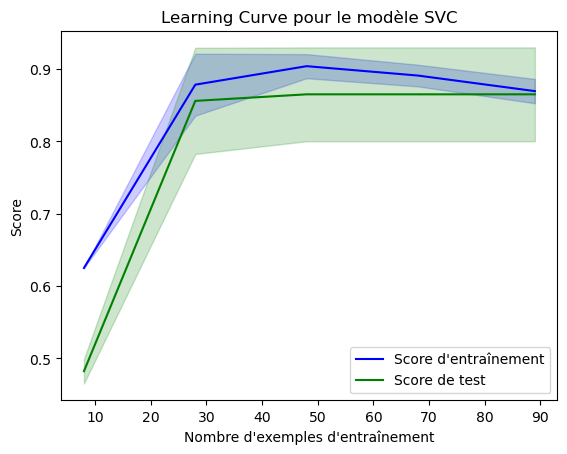

In [40]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# Créer la learning curve pour le meilleur modèle trouvé par GridSearchCV
train_sizes, train_scores, test_scores = learning_curve(grid_search.best_estimator_, X_train_scaled, y_train, cv=5, n_jobs=-1)

# Calculer la moyenne et l'écart-type pour les courbes
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_std = test_scores.std(axis=1)

# Tracer les courbes
plt.plot(train_sizes, train_mean, label="Score d'entraînement", color='blue')
plt.plot(train_sizes, test_mean, label="Score de test", color='green')

# Tracer l'intervalle d'erreur
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

plt.title("Learning Curve pour le modèle SVC")
plt.xlabel("Nombre d'exemples d'entraînement")
plt.ylabel("Score")
plt.legend()
plt.show()


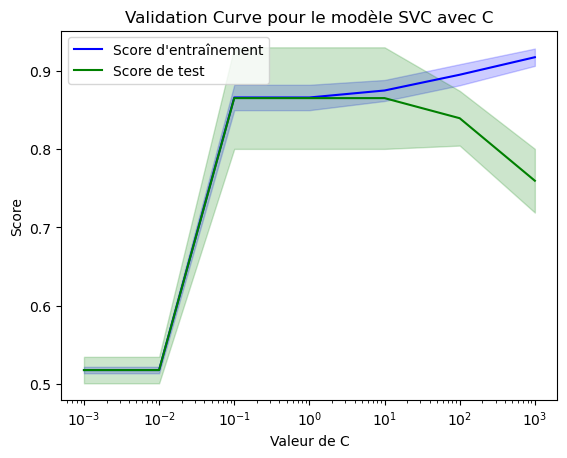

In [41]:
from sklearn.model_selection import validation_curve
import numpy as np

# Tester l'impact de C
param_range = np.logspace(-3, 3, 7)

train_scores, test_scores = validation_curve(SVC(), X_train_scaled, y_train, param_name='C', param_range=param_range, cv=5, scoring='accuracy')

# Calculer la moyenne et l'écart-type
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_std = test_scores.std(axis=1)

# Tracer la validation curve
plt.plot(param_range, train_mean, label="Score d'entraînement", color='blue')
plt.plot(param_range, test_mean, label="Score de test", color='green')

# Tracer l'intervalle d'erreur
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

plt.title("Validation Curve pour le modèle SVC avec C")
plt.xlabel("Valeur de C")
plt.ylabel("Score")
plt.legend()
plt.xscale('log')
plt.show()


#### 9) Entrainer votre modèle sur les hyperparamètres qui donne la meilleur performance

In [42]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Meilleurs hyperparamètres trouvés
best_params = grid_search.best_params_

# Créer un modèle SVC avec les meilleurs hyperparamètres
best_svc = SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'])

# Entraîner le modèle sur l'ensemble d'entraînement
best_svc.fit(X_train_scaled, y_train)

# Prédire sur l'ensemble de test
y_pred = best_svc.predict(X_test_scaled)

# Calculer et afficher la précision sur l'ensemble de test
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision sur l'ensemble de test : {accuracy:.4f}")



Précision sur l'ensemble de test : 0.8571


##### Commenter la qualité de prédiction



In [ ]:
une précision de 85.71% est un bon début, mais une évaluation plus complète avec des métriques supplémentaires permettrait de mieux comprendre la performance réelle du modèle, notamment dans des contextes avec des classes déséquilibrées.

#### 10) Réaliser une prédiction avec votre modèle sur le dataset test. 

- Evaluer la performance de votre modèle 
- Regarder les variables qui participent le plus à votre modèle, utiliser la fonction fournie 
- Commenter les résultats

In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance

# 1. Prédiction avec le modèle SVC
y_pred_test = best_svc.predict(X_test_scaled)

#### Performance in et out sample

Précision sur le dataset test : 0.8571
Matrice de confusion :
[[13  3]
 [ 1 11]]
Rapport de classification :
              precision    recall  f1-score   support

           0       0.93      0.81      0.87        16
           1       0.79      0.92      0.85        12

    accuracy                           0.86        28
   macro avg       0.86      0.86      0.86        28
weighted avg       0.87      0.86      0.86        28



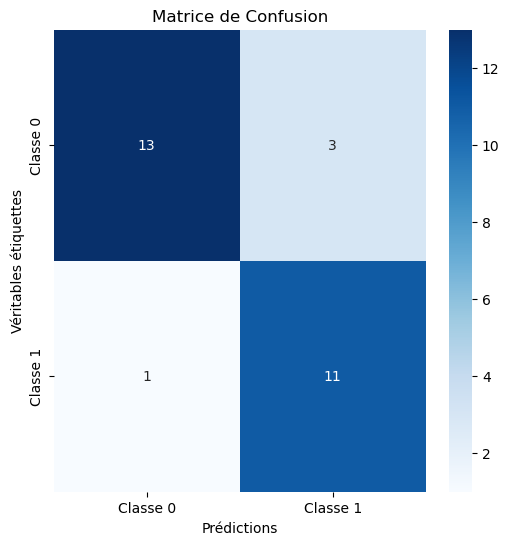

In [44]:
# 2. Évaluation de la performance du modèle
accuracy = accuracy_score(y_test, y_pred_test)
print(f"Précision sur le dataset test : {accuracy:.4f}")

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Matrice de confusion :")
print(conf_matrix)

# Rapport de classification (précision, rappel, F1-score)
class_report = classification_report(y_test, y_pred_test)
print("Rapport de classification :")
print(class_report)

# Visualisation de la matrice de confusion
plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.title("Matrice de Confusion")
plt.xlabel("Prédictions")
plt.ylabel("Véritables étiquettes")
plt.show()


#### Influence de vos features sur le modèle

In [45]:
#plt.title('nom_sympa')
#plt.xlabel('Valeur des coéfficients')
#svm_f_importances(<model_coef>, features_names)


# 3. Identifier les variables les plus importantes
if best_params['kernel'] == 'linear':
    # Pour SVC avec noyau linéaire, on peut regarder les coefficients
    importance = abs(best_svc.coef_.toarray().flatten())
    feature_importance = pd.Series(importance, index=X.columns).sort_values(ascending=False)
    print("Importance des variables pour un SVC avec noyau linéaire :")
    print(feature_importance)
else:
    # Pour un SVC avec noyau RBF, utiliser permutation importance
    result = permutation_importance(best_svc, X_test_scaled, y_test, n_repeats=10, random_state=42, n_jobs=-1)
    feature_importance = pd.Series(result.importances_mean, index=X.columns).sort_values(ascending=False)
    print("Importance des variables pour un SVC avec noyau RBF :")
    print(feature_importance)


Importance des variables pour un SVC avec noyau RBF :
petal_width     0.042857
petal_length    0.028571
sepal_width     0.021429
sepal_length    0.000000
dtype: float64


## Exercice N°2 : Modélisation multiclass avec dataset IRIS

#### 1) Importer le dataset Iris depuis sklearn

Avec le module datasets.load_iris(). **A ce stade plus besoin d'utiliser le dataset Iris modifié.**

Ne supprimer pas la 3ème espèce de fleur, nous allons maintenant utiliser les 3 target.

In [46]:
from sklearn.datasets import load_iris
import pandas as pd

# Charger le dataset Iris
iris = load_iris()

# Convertir en DataFrame pour une meilleure manipulation
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="target")

# Aperçu des données
print(X.head())
print(y.value_counts())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
0    50
1    50
2    50
Name: target, dtype: int64


#### 2 Entrainer un SVM pour une classification multiclass

- Définir la stratégie en s'appuyant sur les éléments vus en cours
- Que faut-il modifier pour que le SVM puisse faire une classification multiclass?

- Combien de modèles faut-il prédire?
- Tester avec la méthode OVO et OVR

#### Stratégie




**Nombre de modèles**




In [ ]:
Pour entraîner un SVM pour la classification multiclass, il est nécessaire de choisir une stratégie car un SVM est initialement conçu pour des problèmes binaires. Deux stratégies principales sont disponibles :

OVO (One-vs-One) : Crée un modèle entre chaque paire de classes (par exemple, pour 3 classes : {0, 1}, {0, 2}, {1, 2}).

Avec n classes, il faut entraîner (𝑛(𝑛−1))/2 modèles.
Avantage : Rapide pour des datasets avec peu de classes.
Inconvénient : Peut devenir coûteux en temps de calcul pour un grand nombre de classes.
OVR (One-vs-Rest) : Crée un modèle pour chaque classe contre toutes les autres classes.

Avec n classes, il faut entraîner n modèles.
Avantage : Plus simple à implémenter.
Inconvénient : Peut être moins performant pour certaines données.


Que faut-il modifier pour que le SVM puisse faire une classification multiclass ?

Il suffit de définir une stratégie (OVO ou OVR) en ajustant l'hyperparamètre decision_function_shape dans SVC.


Combien de modèles faut-il prédire ?
Pour OVO : 
(𝑛(𝑛−1))/2, où 𝑛=n=3. Donc, il faudra entraîner 3 modèles.
Pour OVR : 
n. Donc, il faudra entraîner 3 modèles également.

#### Test modélisation

In [47]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialiser le modèle SVM avec stratégie OVR
svc_ovr = SVC(kernel="rbf", C=1, gamma="scale", decision_function_shape="ovr")

# Entraîner le modèle
svc_ovr.fit(X, y)

# Prédire sur les mêmes données (ou utiliser un ensemble de test si disponible)
y_pred_ovr = svc_ovr.predict(X)

# Évaluer la performance
accuracy_ovr = accuracy_score(y, y_pred_ovr)
print(f"Précision (OVR) : {accuracy_ovr:.4f}")

# Rapport de classification et matrice de confusion
print("Matrice de confusion (OVR) :")
print(confusion_matrix(y, y_pred_ovr))
print("Rapport de classification (OVR) :")
print(classification_report(y, y_pred_ovr))


Précision (OVR) : 0.9733
Matrice de confusion (OVR) :
[[50  0  0]
 [ 0 48  2]
 [ 0  2 48]]
Rapport de classification (OVR) :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.96      0.96        50
           2       0.96      0.96      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [48]:
# Initialiser le modèle SVM avec stratégie OVO
svc_ovo = SVC(kernel="rbf", C=1, gamma="scale", decision_function_shape="ovo")

# Entraîner le modèle
svc_ovo.fit(X, y)

# Prédire sur les mêmes données
y_pred_ovo = svc_ovo.predict(X)

# Évaluer la performance
accuracy_ovo = accuracy_score(y, y_pred_ovo)
print(f"Précision (OVO) : {accuracy_ovo:.4f}")

# Rapport de classification et matrice de confusion
print("Matrice de confusion (OVO) :")
print(confusion_matrix(y, y_pred_ovo))
print("Rapport de classification (OVO) :")
print(classification_report(y, y_pred_ovo))


Précision (OVO) : 0.9733
Matrice de confusion (OVO) :
[[50  0  0]
 [ 0 48  2]
 [ 0  2 48]]
Rapport de classification (OVO) :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.96      0.96        50
           2       0.96      0.96      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



3) Existe-t-il des différences entre OVO et OVR?

In [ ]:
Les résultats sont identiques entre OVO et OVR car :

Le dataset est bien équilibré.
Les classes sont bien séparées.
Le modèle utilisé est puissant (SVM avec kernel RBF).
Dans d'autres contextes, les performances peuvent différer, et le choix entre OVO et OVR dépendra de la structure des données, du nombre de classes, et des ressources disponibles.

<center><h3> Merci de rendre lisible votre code, un groupe présentera ses travaux à l'oral à la fin du cours.</h3></center>